In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [2]:
test = pd.read_csv('D:/taxi/test.csv')

In [3]:
train = pd.read_csv('D:/taxi/train.csv',nrows=100_000)

In [4]:
print(len(train))

100000


In [5]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
train['key'] = pd.to_datetime(train['key'], format= '%Y/%m/%d %H:%M:%S', exact= True)
train['pickup_datetime']  = train.pickup_datetime.str[:20]
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'], format = '%Y/%m/%d %H:%M:%S')

In [10]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [12]:
train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [21]:
train.describe().round(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,11.4,-72.5,39.9,-72.5,39.9,1.7
std,9.7,10.7,6.2,10.5,6.2,1.3
min,-44.9,-736.6,-74.0,-84.7,-74.0,0.0
25%,6.0,-74.0,40.7,-74.0,40.7,1.0
50%,8.5,-74.0,40.8,-74.0,40.8,1.0
75%,12.5,-74.0,40.8,-74.0,40.8,2.0
max,200.0,40.8,401.1,40.9,404.6,6.0


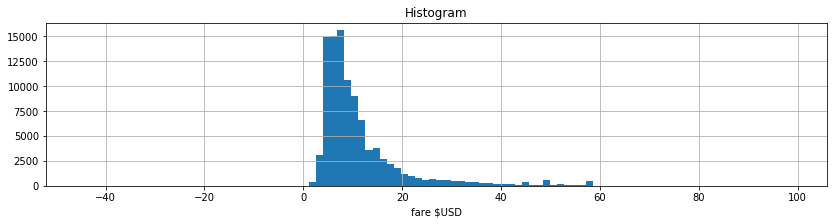

In [15]:
train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [17]:
train.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [18]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [20]:
test.describe().round(1)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.0,9914.0,9914.0,9914.0,9914.0
mean,-74.0,40.8,-74.0,40.8,1.7
std,0.0,0.0,0.0,0.0,1.3
min,-74.3,40.6,-74.3,40.6,1.0
25%,-74.0,40.7,-74.0,40.7,1.0
50%,-74.0,40.8,-74.0,40.8,1.0
75%,-74.0,40.8,-74.0,40.8,2.0
max,-73.0,41.7,-73.0,41.7,6.0


In [23]:
min(test.pickup_longitude.min(), test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(), test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [25]:
min(test.pickup_latitude.min(), test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(), test.dropoff_latitude.max())

(40.568973, 41.709555)

In [26]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            

BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')


BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [29]:
print('Old size: %d' % len(train))
train = train[select_within_boundingbox(train, BB)]
print('New size: %d' % len(train))

Old size: 100000
New size: 97871


In [30]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

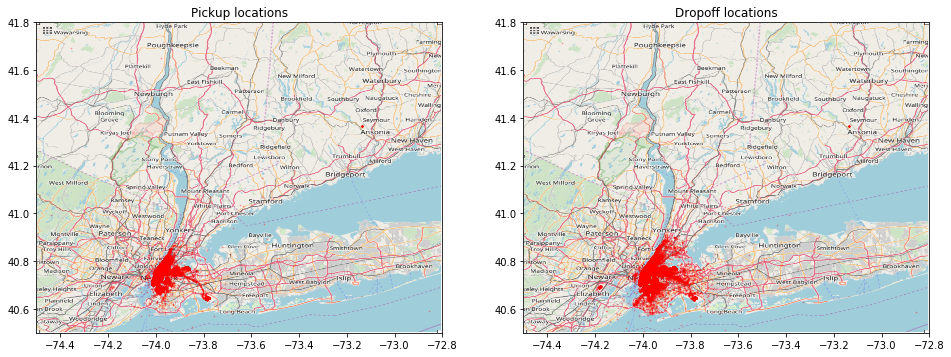

In [32]:
plot_on_map(train, BB, nyc_map, s=0.5, alpha=0.3)

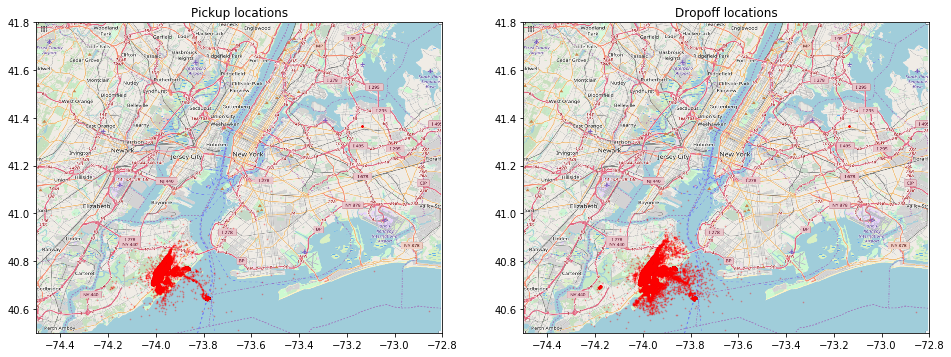

In [34]:
plot_on_map(train, BB, nyc_map_zoom, s=0.5, alpha=0.3)


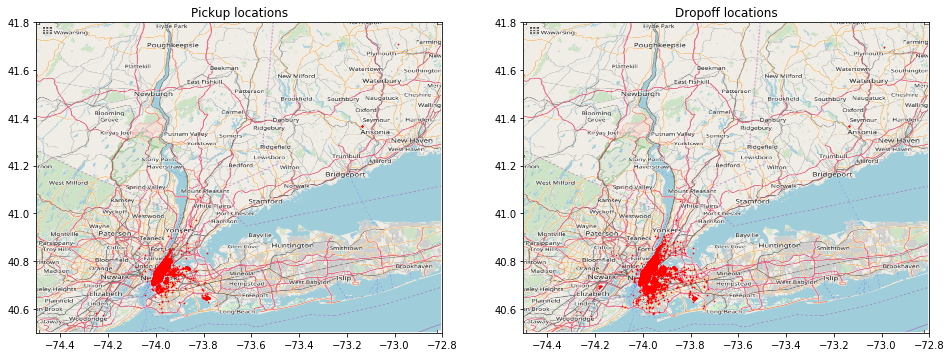

In [36]:
plot_on_map(test, BB, nyc_map, alpha=1.0, s=0.5)

In [38]:
def lonlat_to_xy(longitude, latitude, dx, dy, BB):
    return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
           (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

In [40]:
pickup_x, pickup_y = lonlat_to_xy(train.pickup_longitude, train.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)
dropoff_x, dropoff_y = lonlat_to_xy(train.dropoff_longitude, train.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)

In [41]:
idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print((np.sum(~idx)))

20


In [43]:
def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    BB = (-74.5, -72.8, 40.5, 41.8)
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    return df[idx]

In [45]:
print(len(train))
train = remove_datapoints_from_water(train)
print(len(train))

97871
97851


In [46]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [47]:
train.shape

(97851, 8)

In [49]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train)

In [50]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754


In [51]:
import datetime as dt

train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day_of_Week'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day_of_Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,2010,3,9,1,7


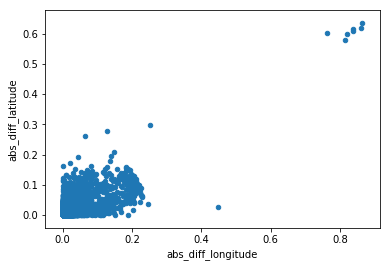

In [53]:
plot = train.iloc[:10000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [56]:
print(len(train))
train = train[(train.abs_diff_longitude < 2.0) & (train.abs_diff_latitude < 2.0)]
print(len(train))

97851
97851


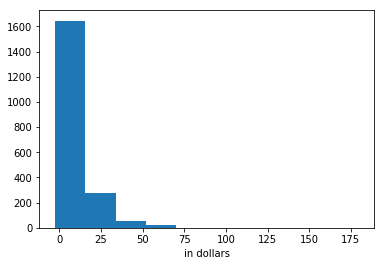

In [58]:
plt.hist(train['fare_amount'][:2000])

plt.xlabel('in dollars')
plt.show()

In [59]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'abs_diff_longitude', 'abs_diff_latitude', 'Year',
       'Month', 'Date', 'Day_of_Week', 'Hour'],
      dtype='object')

In [61]:
def get_input_matrix(df):
    return np.column_stack((df.pickup_longitude, df.abs_diff_longitude, df.abs_diff_latitude, 
                            df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude, 
                            df.Hour, df.Day_of_Week, df.Month, df.Year))

X = get_input_matrix(train)
Y = np.array(train['fare_amount'])

print(X.shape)
print(Y.shape)

(97851, 10)
(97851,)


In [62]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.0005, random_state=0)

print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(97802, 10)
(49, 10)
(97802,)
(49,)


In [63]:
learning_rates = [1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators = 10, learning_rate = learning_rate, max_depth = 6, random_state = 0)
    gb.fit(X_train, Y_train)
    pred_train = gb.predict(X_train)
    pred_validation = gb.predict(X_validation)
    print("Learning rate: ", learning_rate)
    print("RMSE (training): {0:.3f}".format(np.sqrt(mean_squared_error(Y_train, pred_train))))
    print("RMSE (validation): {0:.3f}".format(np.sqrt(mean_squared_error(Y_validation, pred_validation))))
    print()

Learning rate:  1
RMSE (training): 3.390
RMSE (validation): 2.979



In [66]:
print(pred_train)

[18.68211663 17.01104099  6.77028189 ... 29.67962996 14.56210229
  4.2417381 ]
